🎯 Desafio dia 73 — Notas de Alunos em Cursos Online

📂 Dataset: desafio_dia_73_notas_alunos.csv
📥 Clique aqui para baixar o CSV

🔍 Contexto: Você trabalha na área de análise de dados de uma plataforma de cursos online. Recebeu os dados dos alunos de diferentes estados e cursos, com notas em duas avaliações e a informação se o curso foi concluído.

🛠️ Tarefas do desafio:
Tratamento de dados

- Preencha os valores ausentes das colunas nota_1 e nota_2 com a média respectiva de cada curso (groupby("curso").transform("mean")).

Análise geral

- Qual curso tem maior média final (média entre nota_1 e nota_2)?

- Qual o percentual de conclusão por estado?

Visualização de dados

- Crie um gráfico de barras com a média final dos alunos por curso.

Machine Learning - Classificação

- Crie um modelo para prever se o aluno vai concluir o curso com base em:

    nota_1, nota_2, curso, sexo, estado

    Use RandomForestClassifier, train_test_split e pd.get_dummies.

    Avalie o desempenho do modelo com accuracy_score.

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [34]:
df = pd.read_csv("desafio_dia_73_notas_alunos.csv")
df.head()

,id_aluno,curso,sexo,estado,nota_1,nota_2,concluiu
0,1001,Power BI,Feminino,MG,8.2,6.2,Sim
1,1002,Power BI,Feminino,RS,7.8,6.9,Sim
2,1003,Python,Feminino,PR,5.3,7.3,Sim
3,1004,Python,Masculino,RS,6.5,8.2,Não
4,1005,SQL,Feminino,MG,6.5,NaN,Sim


In [7]:
#Preencha os valores ausentes das colunas nota_1 e nota_2 com a média respectiva de cada curso 
df["nota_1"] = df["nota_1"].fillna(df.groupby("curso")["nota_1"].transform("mean"))
print(df["nota_1"].isna().sum())

df["nota_2"] = df["nota_2"].fillna(df.groupby("curso")["nota_2"].transform("mean"))
print(df["nota_2"].isna().sum())

0
0


In [37]:
#Qual curso tem maior média final (média entre nota_1 e nota_2)?
df["media_final"] = (df["nota_1"] + df["nota_2"]) / 2
media_curso = df.groupby("curso")["media_final"].mean().sort_values(ascending=False)
print(media_curso)

curso
Python              7.159783
Machine Learning    7.148864
Power BI            7.110309
Excel               7.096196
SQL                 7.059259
Name: media_final, dtype: float64


In [35]:
#Qual o percentual de conclusão por estado?
df["concluiu"] = df["concluiu"].map({"Sim": 1, "Não": 0})

percent_conclusao = df.groupby("estado")["concluiu"].mean() * 100
print(percent_conclusao.sort_values(ascending=False))

estado
RJ    77.777778
SP    70.967742
MG    70.476190
PR    65.263158
RS    64.285714
Name: concluiu, dtype: float64


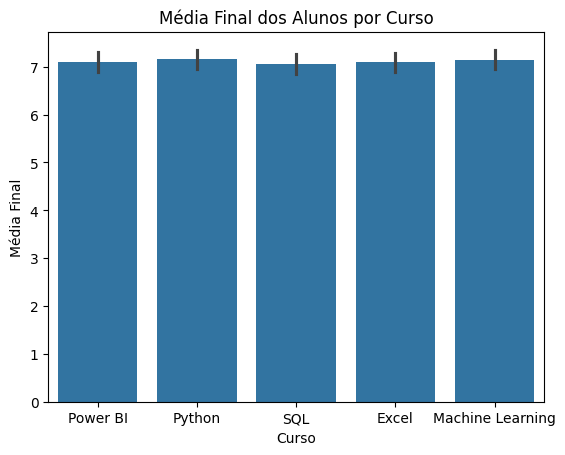

In [42]:
#Crie um gráfico de barras com a média final dos alunos por curso.
sns.barplot(df, x="curso", y="media_final")
plt.title("Média Final dos Alunos por Curso")
plt.ylabel("Média Final")
plt.xlabel("Curso")
plt.show()

In [45]:
#Crie um modelo para prever se o aluno vai concluir o curso com base em:
X = df[["nota_1", "nota_2", "curso", "sexo", "estado"]]
y = df["concluiu"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6122448979591837
